In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from matplotlib import cm
from statsmodels.api import OLS
from pandas.plotting import scatter_matrix
import scipy as sci


from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
loan_df = pd.read_csv('LoansRevised.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 70 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   loan_amnt                1048575 non-null  int64  
 1   funded_amnt              1048575 non-null  int64  
 2   funded_amnt_inv          1048575 non-null  float64
 3   term                     1048575 non-null  object 
 4   int_rate                 1048575 non-null  float64
 5   installment              1048575 non-null  float64
 6   grade                    1048575 non-null  object 
 7   sub_grade                1048575 non-null  object 
 8   emp_title                958131 non-null   object 
 9   emp_length               971110 non-null   object 
 10  home_ownership           1048575 non-null  object 
 11  annual_inc               1048575 non-null  float64
 12  verification_status      1048575 non-null  object 
 13  issue_d                  1048575 non-null 

In [3]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0,0,100.0,1,0,60124,16901,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0,0,95.0,1,0,372872,99468,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0,0,100.0,0,0,136927,11749,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,0,0,100.0,0,0,385183,36151,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0,0,92.3,0,0,157548,29674,N,Cash,N


In [4]:
loan_df.dtypes.value_counts()

float64    26
int64      24
object     20
Name: count, dtype: int64

In [5]:
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
loan_df['loan_status'].value_counts()

loan_status
Current               603273
Fully Paid            331528
Charged Off            94286
Late (31-120 days)     12154
In Grace Period         5151
Late (16-30 days)       2162
Default                   21
Name: count, dtype: int64

The Summary Statistics of the numerical variables

In [6]:
#numerical variables
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1048575.0,15384.873662,9533.837804,1.000000e+03,8000.00,13000.00,20000.000000,4.000000e+04
funded_amnt,1048575.0,15384.846959,9533.839682,1.000000e+03,8000.00,13000.00,20000.000000,4.000000e+04
funded_amnt_inv,1048575.0,15379.753334,9532.473117,7.250000e+02,8000.00,13000.00,20000.000000,4.000000e+04
int_rate,1048575.0,12.802900,4.962779,5.310000e+00,9.16,11.99,15.490000,3.099000e+01
installment,1048575.0,453.824905,276.206891,1.477000e+01,251.65,380.66,609.440000,1.670150e+03
annual_inc,1048575.0,79674.606751,84101.832523,0.000000e+00,47000.00,66000.00,95000.000000,9.930475e+06
dti,1047378.0,19.289330,15.896022,-1.000000e+00,11.93,18.05,25.020000,9.990000e+02
mths_since_last_delinq,509799.0,35.059031,21.914450,0.000000e+00,17.00,32.00,51.000000,2.260000e+02
open_acc,1048575.0,11.705442,5.846288,0.000000e+00,8.00,11.00,15.000000,1.010000e+02
pub_rec,1048575.0,0.196283,0.566904,0.000000e+00,0.00,0.00,0.000000,8.600000e+01


Observations- There are a big variety of ranges among the different variables. If we were to fit a model on this data, we would have to standardize it first. Also certain variables have really high standard deviation, for example the annual income of the borrower (annual_inc).

In [7]:
print('The average loan amount is ${} and the median is ${}.'.format(round(loan_df['loan_amnt'].mean(),2), loan_df['loan_amnt'].median()))

The average loan amount is $15384.87 and the median is $13000.0.


In [8]:
key_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'revol_bal']

<Axes: >

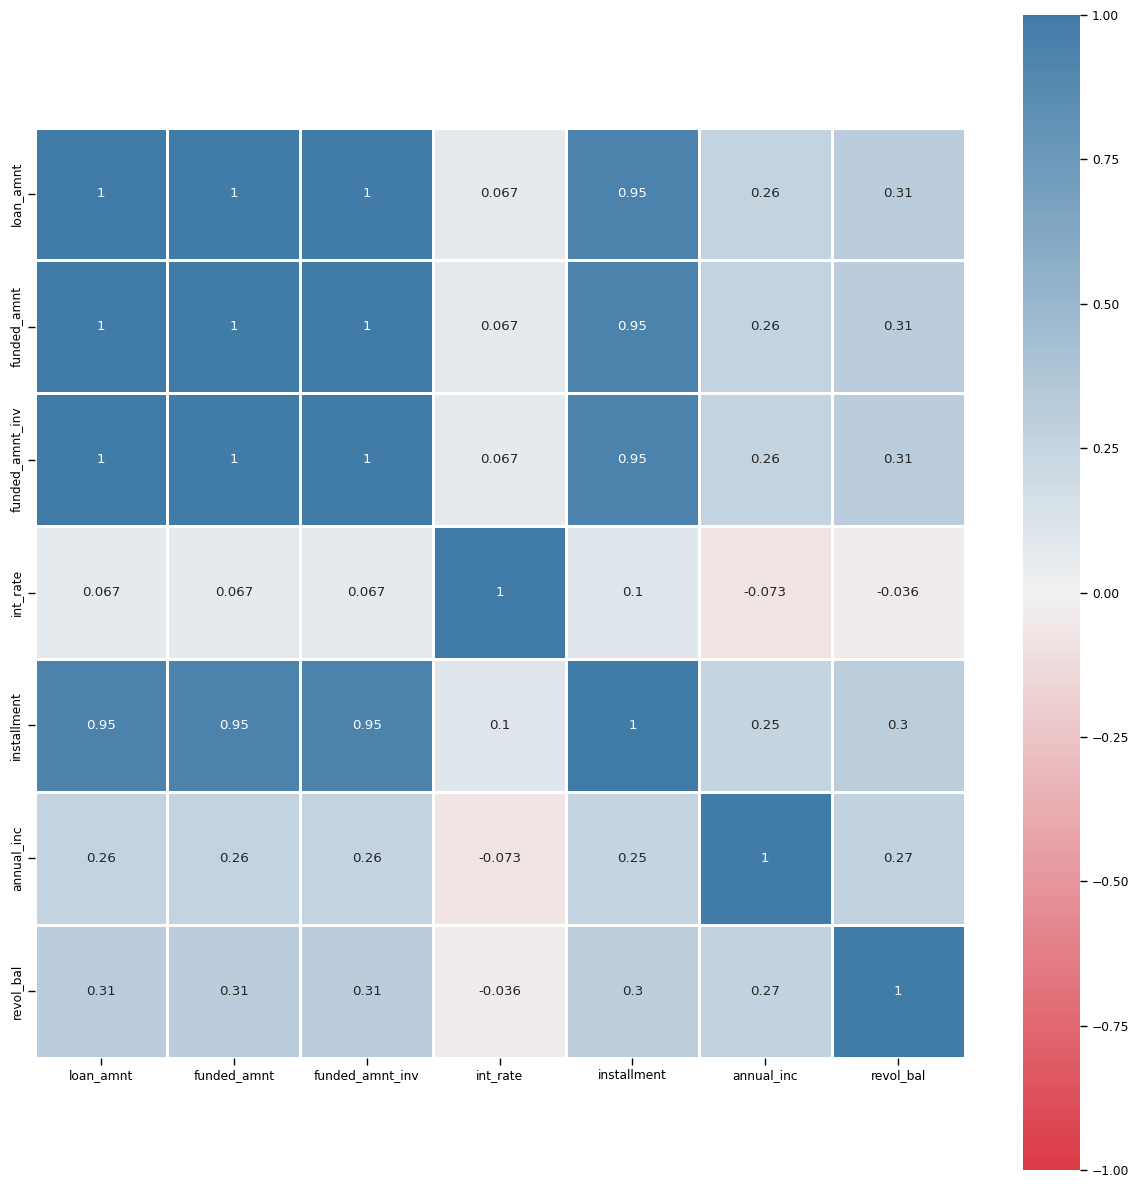

In [9]:
corr = loan_df[key_columns].corr()
plt.figure(figsize=(15,15))
sns.set_context('paper', font_scale=1)
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=1)

Correlation matrix shows that loan_amnt, funded_amnt, funded_amnt_inv and installment are very highly correlated with each other.

Distribution of Loans Status

In [10]:
loan_status_df = loan_df['loan_status'].value_counts().to_frame().reset_index()
loan_status_df.columns = ['Loan Status', 'Count']
loan_status_df

,Loan Status,Count
0,Current,603273
1,Fully Paid,331528
2,Charged Off,94286
3,Late (31-120 days),12154
4,In Grace Period,5151
5,Late (16-30 days),2162
6,Default,21


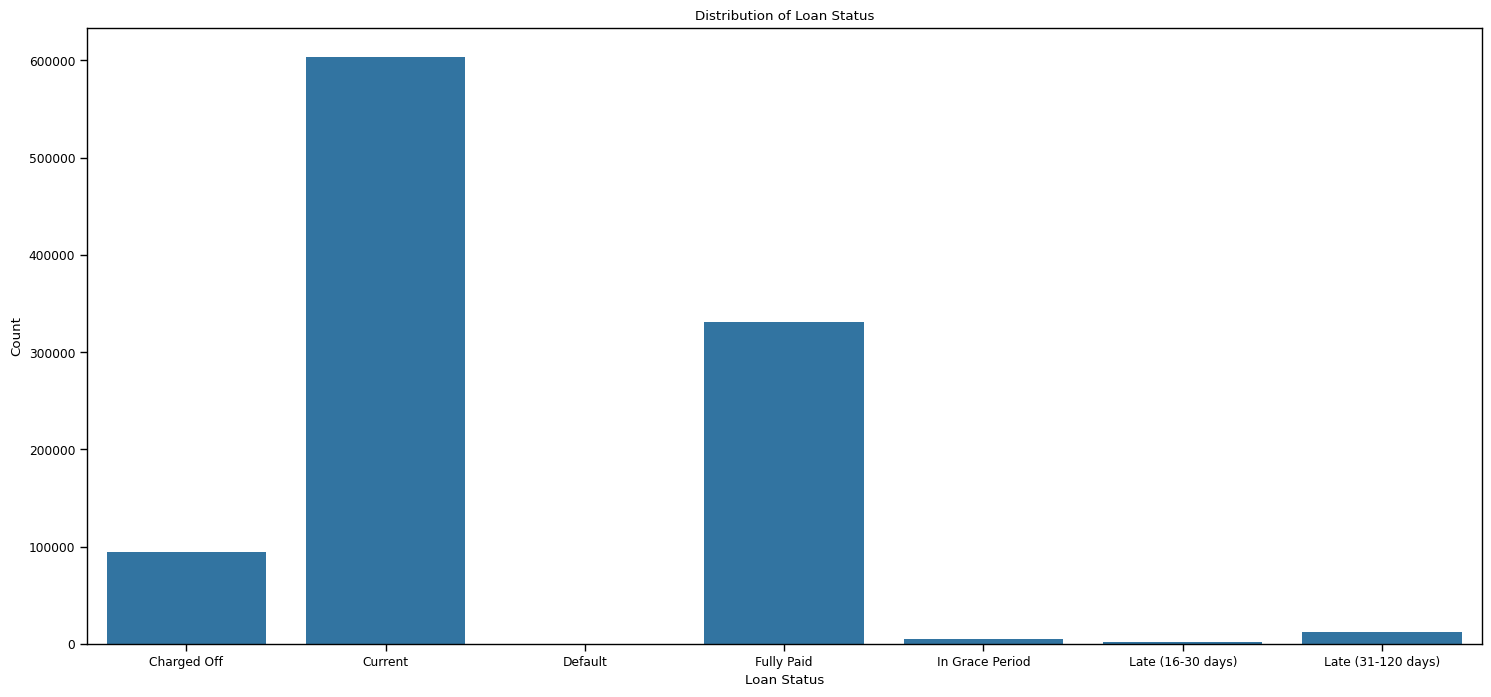

In [11]:
plt.subplots(figsize=(18,8))
sns.barplot(y='Count', x='Loan Status', data=loan_status_df)
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

Most of the loans in the dataset are Current, and the second largest catergory is fully paid. The third Charged off loans(never paid).

Distribution of Loan Purpose

In [12]:
loan_purpose_df = loan_df['purpose'].value_counts().to_frame().reset_index()
loan_purpose_df.columns = ['Loan Purpose', 'Count']
loan_purpose_df

,Loan Purpose,Count
0,debt_consolidation,576361
1,credit_card,249343
2,home_improvement,71496
3,other,69620
4,major_purchase,24344
5,medical,13378
6,car,10831
7,small_business,10396
8,house,7811
9,vacation,7351


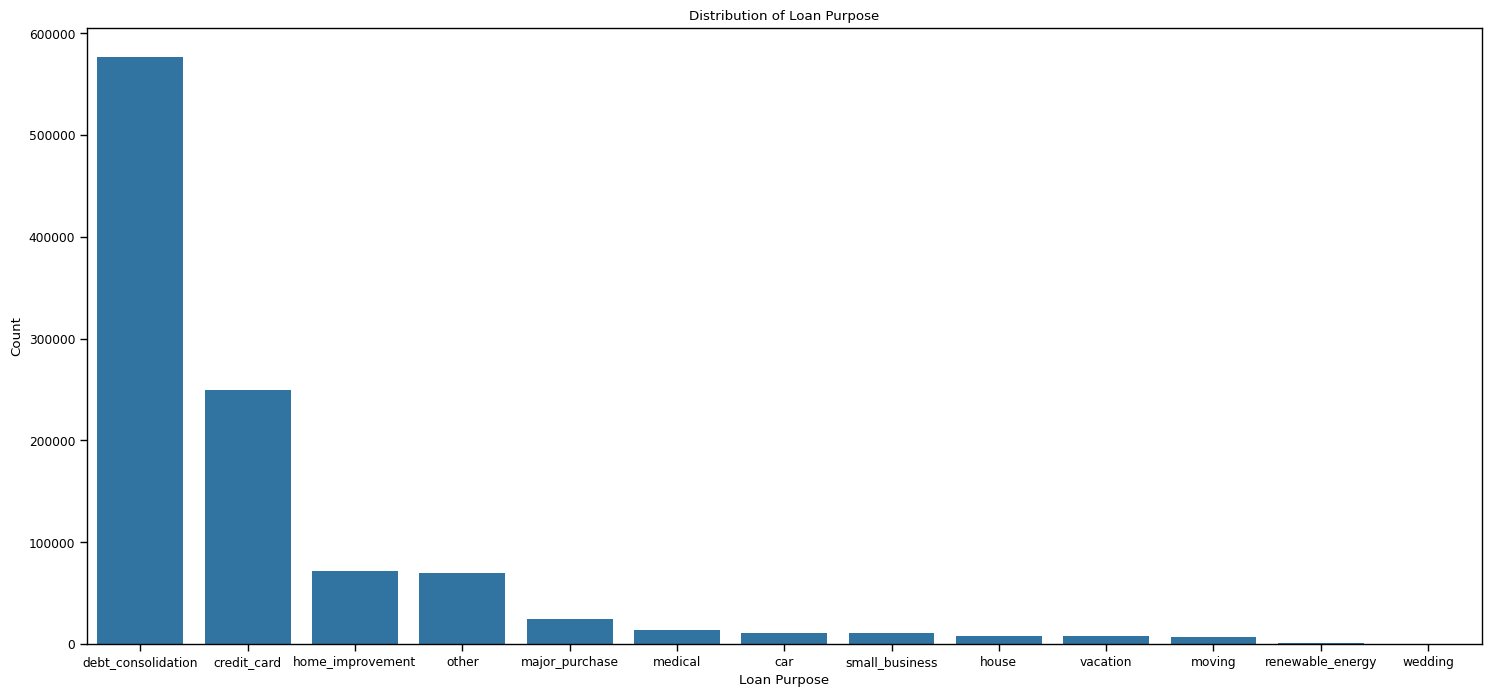

In [13]:
plt.subplots(figsize=(18,8))
sns.barplot(y='Count', x='Loan Purpose', data=loan_purpose_df)
plt.ylabel('Count')
plt.title('Distribution of Loan Purpose')
plt.show()

The most common purpose for a loan origination in our dataset is consolidation of debt, followed by credit card debt.

Distribution of Borrower's Job Title

In [14]:
loan_emp_title_df = loan_df['emp_title'].value_counts().to_frame().reset_index()
loan_emp_title_df.columns = ['Job Title', 'Count']
loan_emp_title_df.head()

,Job Title,Count
0,Teacher,19219
1,Manager,17347
2,Owner,11652
3,Driver,8292
4,Registered Nurse,7982


The most common job titles are Teacher, Manager, and Owner

Distribution of Credit Ratings (i.e Grades)

In [15]:
grade_df = loan_df['grade'].value_counts().to_frame().reset_index()
grade_df.columns = ['Grade', 'Count']
grade_df

,Grade,Count
0,B,312159
1,C,293596
2,A,226847
3,D,144272
4,E,53221
5,F,14773
6,G,3707


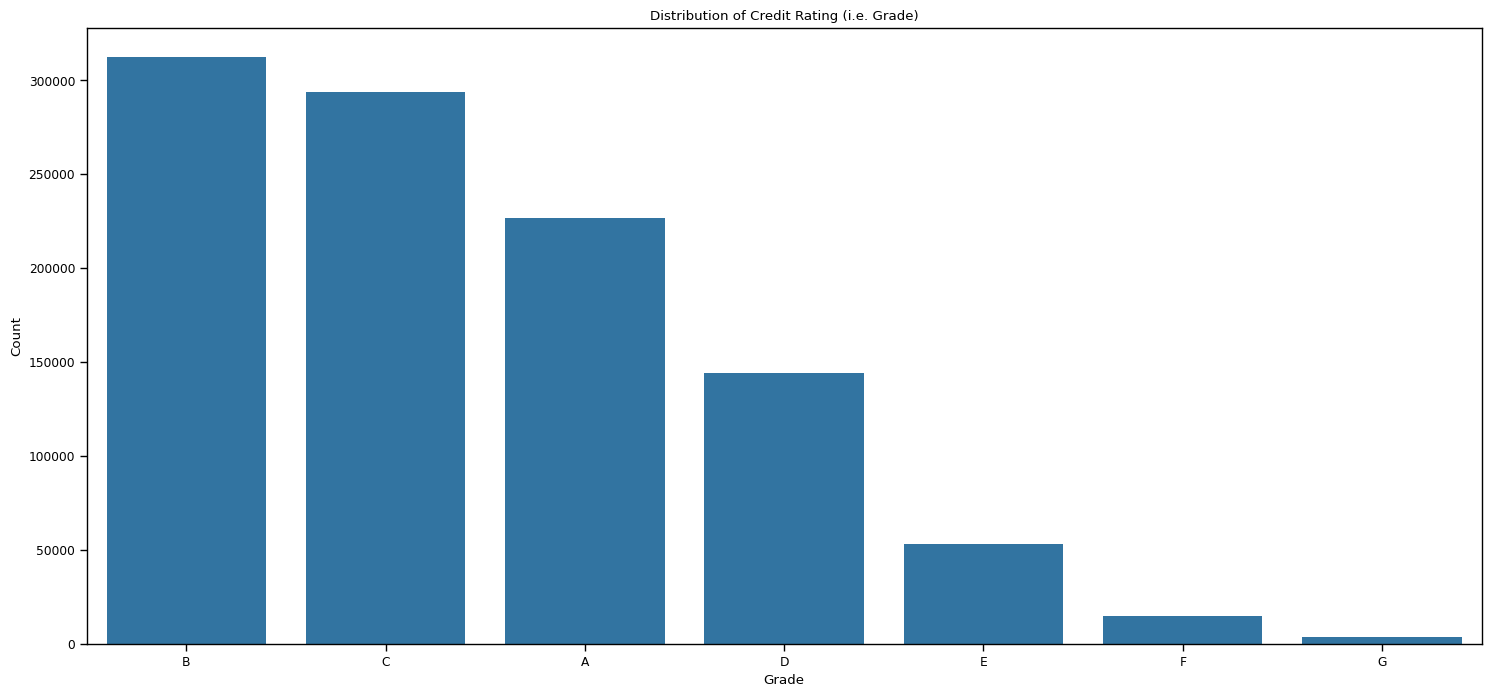

In [16]:
plt.subplots(figsize=(18,8))
sns.barplot(y='Count', x='Grade', data=grade_df)
plt.ylabel('Count')
plt.title('Distribution of Credit Rating (i.e. Grade)')
plt.show()

B and C are the most common credit rating categories in the dataset.

In [19]:
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
loan_df['loan_status'].value_counts()

loan_status
Current               603273
Fully Paid            331528
Charged Off            94286
Late (31-120 days)     12154
In Grace Period         5151
Late (16-30 days)       2162
Default                   21
Name: count, dtype: int64

In [20]:
# filtering only fully paid or charged-off
loan_df = loan_df[loan_df['loan_status'] != 'Current']
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_df['loan_status'].value_counts()

loan_status
0    331528
1    113774
Name: count, dtype: int64

In [22]:
# default rate
round(np.mean(loan_df['loan_status']), 2)

0.26

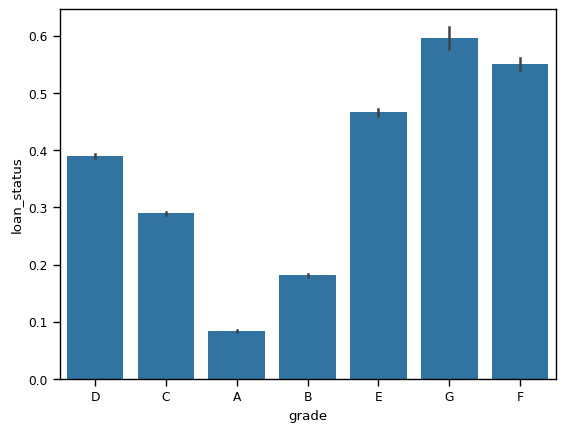

In [25]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan_df)
plt.show()

C:\Users\luz44\AppData\Local\Temp\ipykernel_28000\274638245.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['loan_amnt'])


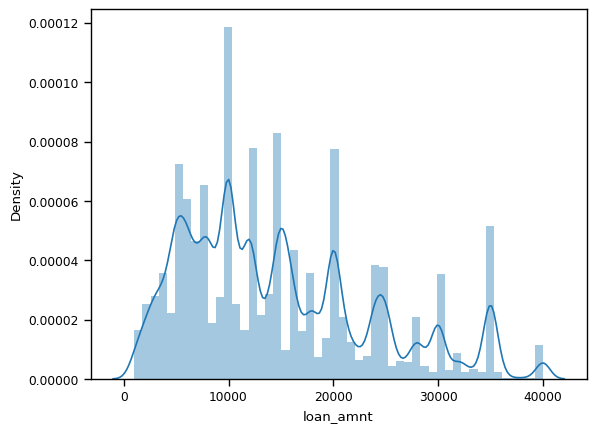

In [29]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan_df['loan_amnt'])
plt.show()